# Best Neighborhood in Pittsburgh — Education Quality (2010)
**Member:** Kade Rolfe

**Dataset:** Education & Income 2010 (City of Pittsburgh SNAP Census) — `education-income.xls`  

**"Bestest":** Education Quality = measure of neighborhood residents with higher education (Associate/prof, Bachelor's, Postgraduate)

---

## Introduction

We define **education quality** as the number of adults (25+) in a neighborhood with credentials of higher education.
Neighborhoods with a higher proportions of college graduates and postgraduate degree holders will rank higher.

The reasons I think education quality means a neighborhood is a good thing:
1. Opporotunity
    - Levels of education reflect the opporotunity and access level in that general area.
2. Intellectual Growth
    - It creates a culture that encourages better education which is great for a neighborhood and it's children.
3. Stability
    - Education correlates to income and stability, meaning a neighborhood's economy and employment rates are affected by the education levels of the residents.
4. Community
    - Education also influences community, safety, and engagement of the people living there.

Hypothesis: neighborhoods with higher percentages of Bachelor's and Postgraduate degrees will be considered "best" for education quality.

In [10]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load the dataset
df = pd.read_excel("education-income.xls")
df.head()

,Neighborhood,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
0,Allegheny Center,3,933,609,0.187192,0.444992,0.172414,0.157635,0.037767,16964.0,20911.0,22535.000000,22792.99,954,324,0.339623
1,Allegheny West,3,462,239,0.092050,0.288703,0.066946,0.447699,0.104603,26638.0,41761.0,35385.954374,45519.49,239,12,0.050209
2,Allentown,6,2500,1729,0.229612,0.633314,0.065934,0.056102,0.015038,22539.0,29274.0,29940.837361,31908.66,2212,630,0.284810
3,Arlington,7,1869,1232,0.149351,0.653409,0.100649,0.071429,0.025162,27167.0,25119.0,36088.678672,27379.71,1779,361,0.202923
4,Arlington Heights,7,244,166,0.180723,0.740964,0.000000,0.078313,0.000000,18646.0,9417.0,24769.371021,10264.53,293,169,0.576792


In [12]:
# Compute education percentages for degree level

# Total adult population (25+)
total_pop = df["Total Pop, 25 and older (2010)"]

# Compute percentages
df["% Associate/Prof Degree"] = (df["Edu. Attainment: Assoc./Prof. Degree (2010)"] / total_pop) * 100
df["% Bachelor's Degree"] = (df["Edu. Attainment: Bachelor's Degree (2010)"] / total_pop) * 100
df["% Postgraduate Degree"] = (df["Edu. Attainment: Postgraduate Degree (2010)"] / total_pop) * 100

df[["Neighborhood", "% Associate/Prof Degree", "% Bachelor's Degree", "% Postgraduate Degree"]].head()

,Neighborhood,% Associate/Prof Degree,% Bachelor's Degree,% Postgraduate Degree
0,Allegheny Center,0.028311,0.025884,0.006201
1,Allegheny West,0.028011,0.187322,0.043767
2,Allentown,0.003813,0.003245,0.000870
3,Arlington,0.008170,0.005798,0.002042
4,Arlington Heights,0.000000,0.047177,0.000000


In [18]:
# Create a "education quality" score
# Higher % for higher education levels

df["Education Score"] = (
    0.5 * df["% Associate/Prof Degree"] +
    1.0 * df["% Bachelor's Degree"] +
    1.5 * df["% Postgraduate Degree"]
)

# 0–100 scale
df["Education Score"] = (df["Education Score"] / df["Education Score"].max()) * 100

# Sort by score
df_sorted = df.sort_values("Education Score", ascending=False)
df_sorted[["Neighborhood", "Education Score"]].head(10)

,Neighborhood,Education Score
70,South Shore,100.000000
86,West End,13.316658
56,North Shore,9.068878
1,Allegheny West,7.849127
79,Strip District,4.471819
31,Fairywood,3.168045
65,Regent Square,2.926547
20,Chartiers City,2.753719
33,Friendship,2.108149
30,Esplen,2.039239


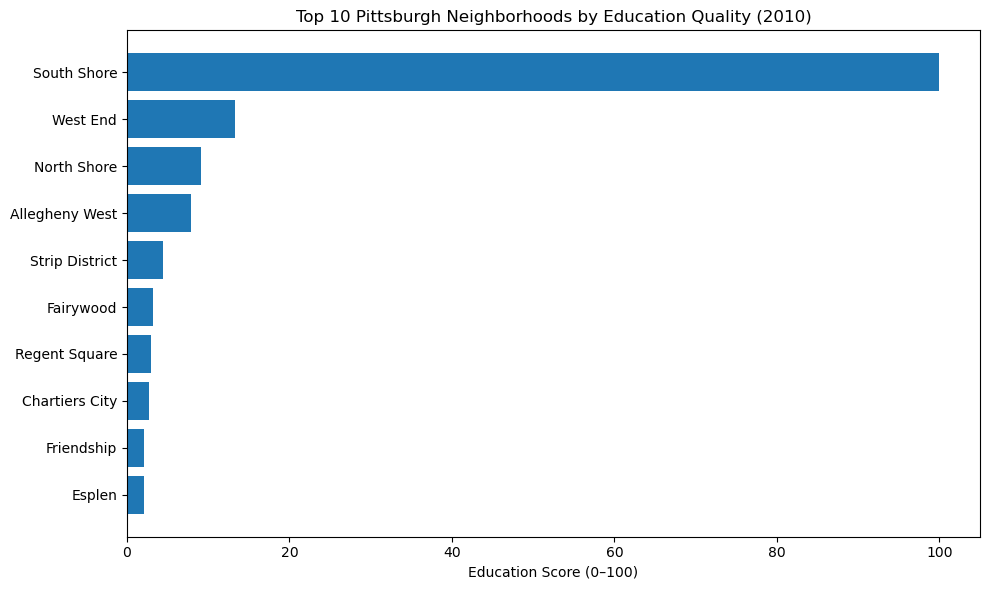

In [19]:
# Top 10 neighborhoods
top10 = df_sorted[["Neighborhood", "Education Score"]].head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["Neighborhood"][::-1], top10["Education Score"][::-1])
plt.xlabel("Education Score (0–100)")
plt.title("Top 10 Pittsburgh Neighborhoods by Education Quality (2010)")
plt.tight_layout()
plt.show()

In [17]:
# Cell 6 — Print the top neighborhood
best = df_sorted.iloc[0]
print("Best neighborhood by education quality:", best["Neighborhood"])
print("Education score (0–100): {:.2f}".format(best["Education Score"]))

Best neighborhood by education quality: South Shore
Education score (0–100): 100.00


## Conclusion

The neighborhood with the highest **education quality score** is...
# SOUTH SHORE
It ranks highest due to a larger share of adults with Bachelor's and Postgraduate degrees.
It turns out South Shore has the highest share because there are only 19 people that live there, but it is the winner none the less.

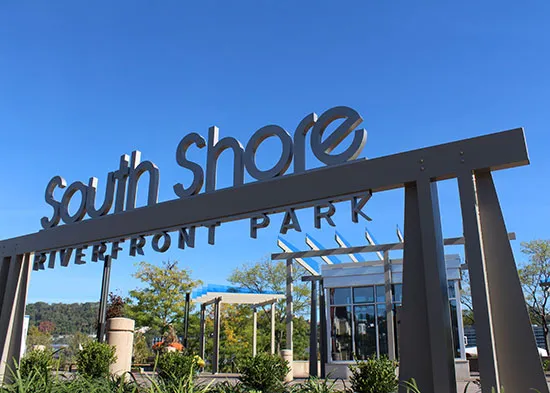